### Este script sirve para graficar las funciones de inyección del estornudo humano

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sinc(amp,x):
    f = np.sin(amp*x)/amp*x
    return f

In [3]:
x_sinc = np.linspace(0,0.1,10000)
x_comp = np.linspace(0.1,0.5, 10000)
x_orig = np.linspace(0,11,10000)

In [5]:
k = 9

In [6]:
sinc_values =sinc(np.pi,np.exp(x_sinc + np.abs(sinc(k*np.pi,x_sinc-k**2))))
sinc_orig = sinc(np.pi, x_orig)



In [7]:
norm = max(sinc_values)/40
norm = round(norm,2)
norm

0.15

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


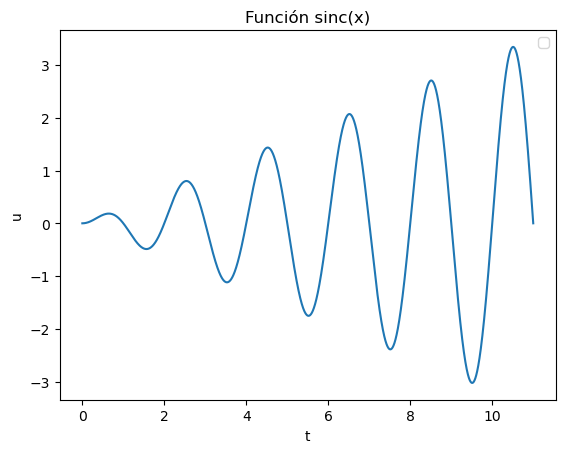

In [8]:
plt.plot(x_orig, sinc_orig)#, label='k='+ str(k))
plt.xlabel('t')
plt.ylabel('u')
plt.title('Función sinc(x)')
plt.legend()
plt.grid(False)
plt.show()

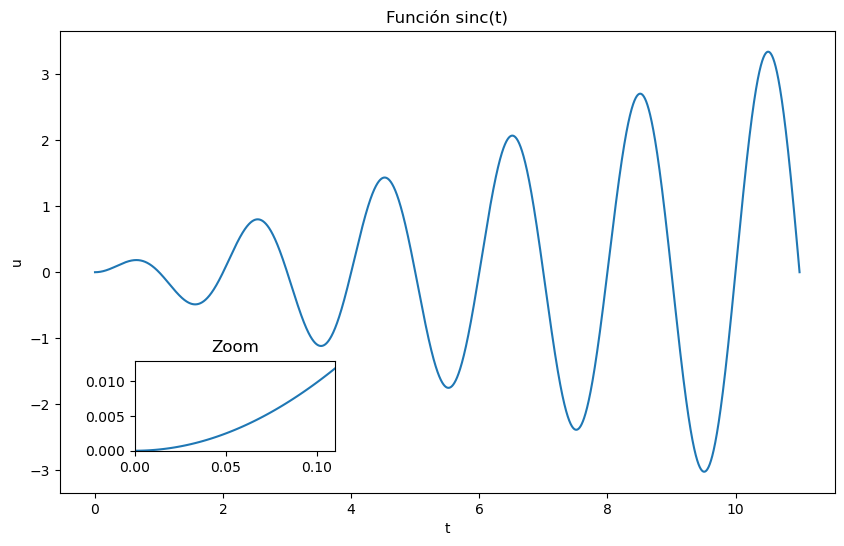

In [9]:
# Ploteamos L vs Epocas
plt.figure(figsize=(10, 6))

# Crear el eje principal
plt.subplot(1, 1, 1)

# Graficar la función de costo en el eje principal
plt.plot(x_orig, sinc_orig)#, label='k='+ str(k))
plt.xlabel('t')
plt.ylabel('u')
plt.title('Función sinc(t)')


# Crear un nuevo eje para el zoom
left, bottom, width, height = [0.2, 0.18, 0.2, 0.15]  # Definir las coordenadas y el tamaño del nuevo eje
ax_zoom = plt.gcf().add_axes([left, bottom, width, height])

# Graficar la función de costo en el eje de zoom
ax_zoom.plot(x_orig, sinc_orig)

ax_zoom.set_title('Zoom')
ax_zoom.set_xlim(0, 0.11)  # Establecer los límites x para la región de interés
ax_zoom.set_ylim(0, 0.013)  # Establecer los límites y para la región de interés
plt.savefig('funcion_sinc.pdf')
plt.show()

In [10]:
k_test = [5,13,21]


In [11]:
def jet(k,x):
    
    f = np.exp(sinc(k*np.pi,x-k**2) + np.abs(sinc(k*np.pi,x-k**2)))
   
    return f


In [12]:
def jet_complement(k,x,u_0):
    return u_0*x
    

5 0.6 25
13 98.03 169
21 15985.12 441


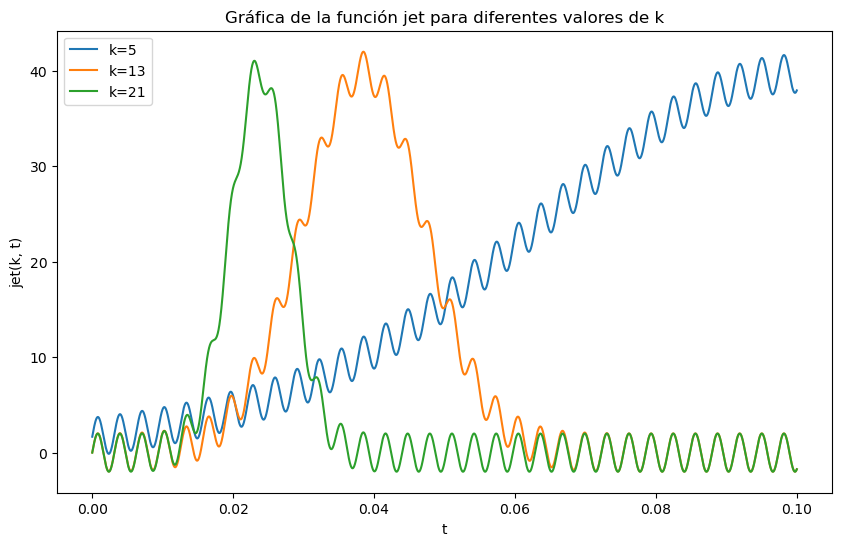

In [13]:
plt.figure(figsize=(10, 6))
for k in k_test:
    # Calcular el valor de normalización
    norm = max(jet(k, x_sinc)) / 40
    norm = round(norm, 2)
    
    print(str(k), str(norm), str(k**2))
    # Graficar la función jet normalizada
    plt.plot(x_sinc, 2*np.sin(2000*x_sinc)+( jet(k, x_sinc)/norm), label='k=' + str(k))
    #plt.plot(x_comp, jet_complement(k, x_comp, 12) , label='k*=' + str(k))

# Añadir etiquetas y leyenda
plt.xlabel('t')
plt.ylabel('jet(k, t)')
plt.title('Gráfica de la función jet para diferentes valores de k')
plt.legend()
plt.show()

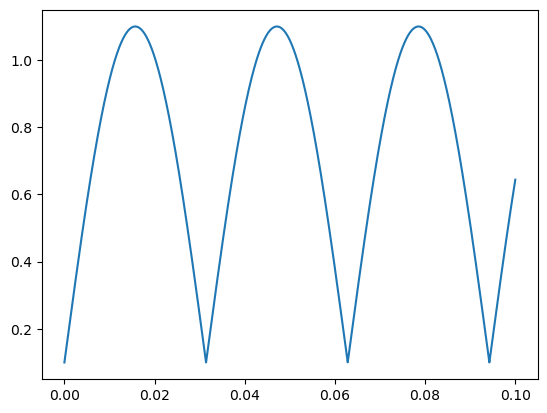

In [14]:
plt.plot(x_sinc, 0.1+np.abs(np.sin(100*x_sinc)), label='sin')


In [15]:
u_values = [jet(k,x) for x in x_sinc] 
    

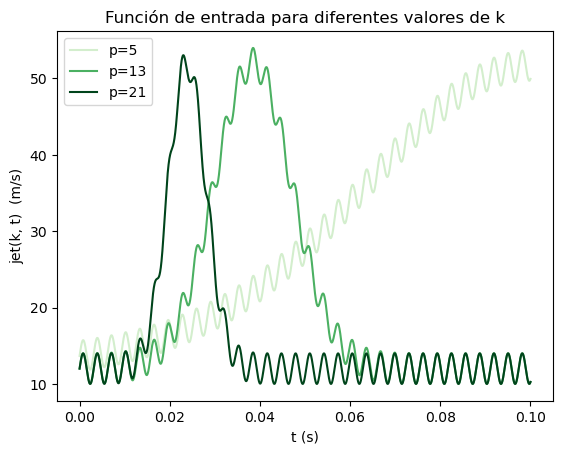

In [16]:
import matplotlib.cm as cm

colors = cm.Greens(np.linspace(0.2, 1, len(k_test)))

for i, k in enumerate(k_test):
    # Calcular el valor de normalización
    norm = max(jet(k, x_sinc)) / 40
    norm = round(norm, 2)
    
    plt.plot(x_sinc, 2*np.sin(2000*x_sinc)+(12 + jet(k, x_sinc)/norm), label='p=' + str(k), color=colors[i])

plt.xlabel('t (s)')
plt.ylabel('jet(k, t)  (m/s)')
plt.title('Función de entrada para diferentes valores de k')
plt.legend()
plt.savefig('jet_family_oscilation.pdf')
plt.show()

In [17]:
2**12

4096

In [18]:
1/0.0005

2000.0

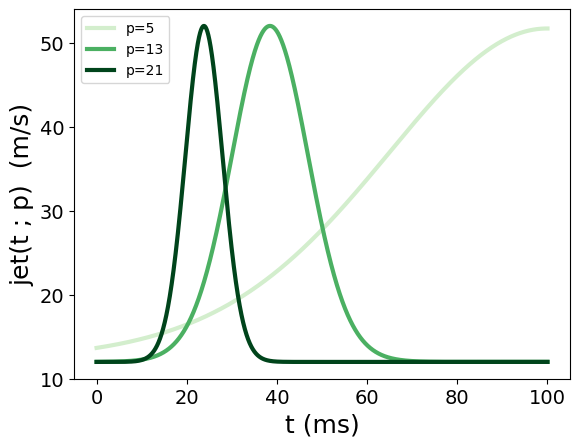

In [21]:
import matplotlib.cm as cm
from matplotlib.ticker import LogLocator, FuncFormatter

colors = cm.Greens(np.linspace(0.2, 1, len(k_test)))
# Función para formatear las etiquetas del eje x
def x_format(value, pos):
    return f"{int(value*1000)}"  # Convertir a miles
for i, k in enumerate(k_test):
    # Calcular el valor de normalización
    norm = max(jet(k, x_sinc)) / 40
    norm = round(norm, 2)
    
    plt.plot(x_sinc,((12 + jet(k, x_sinc)/norm)), label='p=' + str(k), color=colors[i], lw=3)

plt.xlabel('t (ms)', fontsize=18)
plt.ylabel('jet(t ; p)  (m/s)', fontsize=18)
custom_xticks = [0,0.020,0.040,0.060,0.080,0.100]
custom_yticks = [10,20,30,40,50]
plt.yticks(custom_yticks,fontsize=14)
plt.xticks(custom_xticks,fontsize=14)
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_format))  # Formato personalizado para ms

#plt.yscale('log')  # Escala logarítmica para la pérdida
plt.legend(fontsize=16)
#plt.title('Función de entrada para diferentes valores de k')
plt.legend(loc='best')
plt.savefig('jet_family_oscilation.pdf')
plt.show()